**TASK1 =Titanic Survival Prediction**

**Name** - Ahmed Fazal Nagani
**Date** - August batch A67
**Domain**- Data Science


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
task1 = pd.read_csv('/Titanic-Dataset.csv')

In [69]:
task1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
task1.shape

(891, 12)

In [71]:
task1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [72]:
task1['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [73]:
task1['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [74]:
task1['Survived'].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

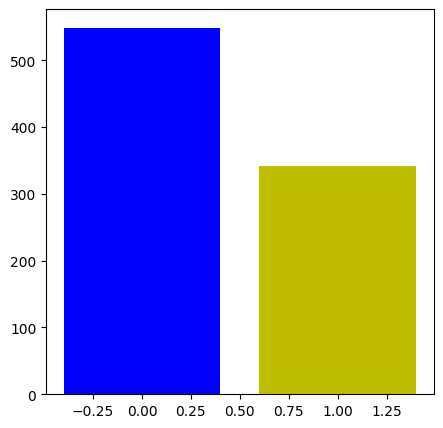

In [75]:
plt.figure(figsize=(5,5))
plt.bar(list(task1['Survived'].value_counts().keys()),list(task1['Survived'].value_counts()), color=["b","y"])
plt.show()

In [93]:
task1['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


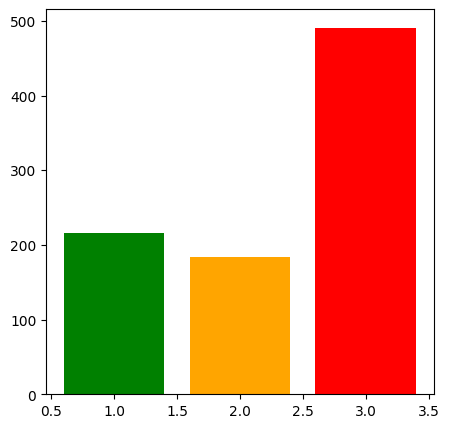

In [94]:
plt.figure(figsize=(5,5))
plt.bar(list(task1['Pclass'].value_counts().keys()),list(task1['Pclass'].value_counts()), color=["red","green","orange"])
plt.show()

In [95]:
task1['Sex'].value_counts()

,count
Sex,
0,577
1,314


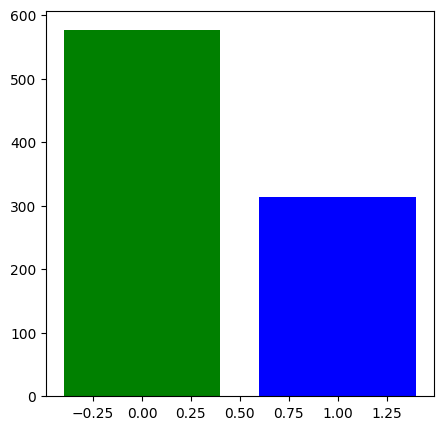

In [96]:
plt.figure(figsize=(5,5))
plt.bar(list(task1['Sex'].value_counts().keys()),list(task1['Sex'].value_counts()), color=["g","b"])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

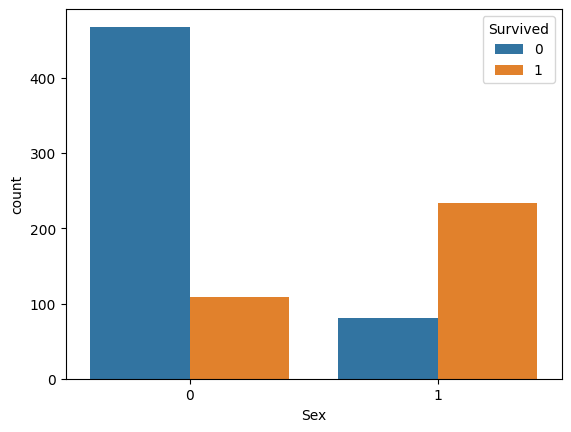

In [97]:
sns.countplot(x=task1['Sex'], hue = task1['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

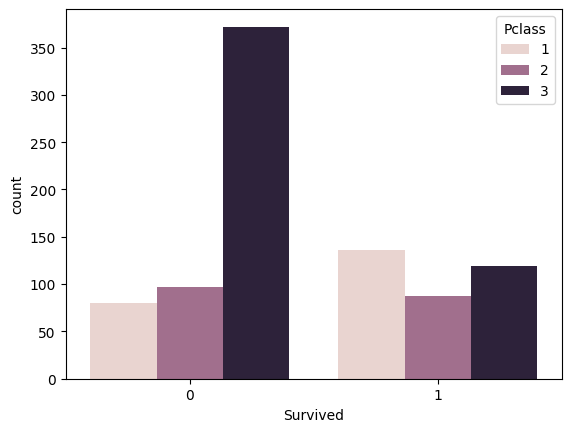

In [98]:
sns.countplot(x=task1['Survived'], hue = task1['Pclass'])

In [99]:
task1.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [100]:
task1.replace({'Sex' :{'male' : 0 , 'female' : 1} }, inplace= True)
task1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [101]:
x=task1[['Pclass','Sex']]
y=task1['Survived']

In [102]:
x,y

(     Pclass  Sex
 0         3    0
 1         1    1
 2         3    1
 3         1    1
 4         3    0
 ..      ...  ...
 886       2    0
 887       1    1
 888       3    1
 889       1    0
 890       3    0
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [103]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state =0)

In [104]:
print (x.shape ,x_train.shape , x_test.shape)

(891, 2) (712, 2) (179, 2)


In [105]:
print (y.shape ,y_train.shape , y_test.shape)

(891,) (712,) (179,)


In [106]:
from sklearn.linear_model import LogisticRegression
ML = LogisticRegression()
ML.fit(x_train , y_train)

LogisticRegression()

In [107]:
x_test_prediction=ML.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [108]:
print (y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [109]:
x_train_prediction = ML.predict(x_train)
print(x_train_prediction)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 

In [110]:
print (y_train)

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64


In [111]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train , x_train_prediction)
test_accuracy=accuracy_score(y_test , x_test_prediction)
print(train_accuracy)
print(test_accuracy)

0.7865168539325843
0.7877094972067039
